In [15]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [16]:
mu_truth = 25
lmd = 0.01

In [17]:
x_line = np.arange(
    mu_truth - 4 * np.sqrt(1 / lmd), 
    mu_truth + 4 * np.sqrt(1 / lmd), 
    0.1
)

In [18]:
#C_N = 1 / np.sqrt(2 * np.pi / lmd)
#true_model = C_N * np.exp(- 0.5 * lmd * (x_line - mu_truth)**2)

true_model = stats.norm.pdf(
    x=x_line, 
    loc=mu_truth, 
    scale=np.sqrt(1 / lmd),
)

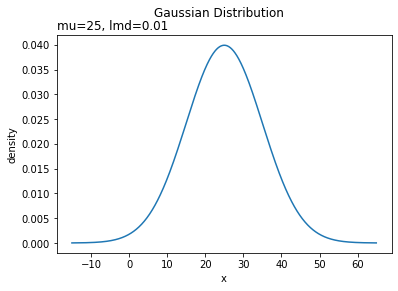

In [19]:
plt.plot(
    x_line, 
    true_model,
)
plt.xlabel('x')
plt.ylabel('density')
plt.suptitle('Gaussian Distribution')
plt.title(
    f'mu={mu_truth}, lmd={lmd}', 
    loc='left',
)
plt.show()

In [20]:
N = 50
x_n = np.random.normal(loc=mu_truth, scale=np.sqrt(1 / lmd), size=N)

print(x_n[:5])

[24.38491346  4.63150159 20.59565765  4.76907504  9.70389668]


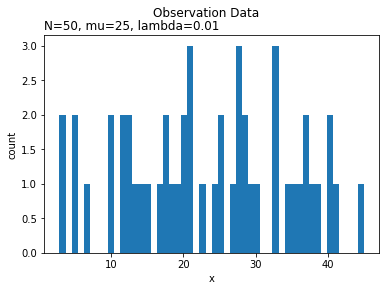

In [21]:
plt.hist(
    x=x_n, 
    bins=50,
)
plt.xlabel('x')
plt.ylabel('count')
plt.suptitle('Observation Data')
plt.title(
    f'N={N}, mu={mu_truth}, lambda={lmd}', 
    loc='left',
)
plt.show()

In [22]:
m = 0
lambda_mu = 0.001

In [25]:
mu_line = np.arange(mu_truth - 30, mu_truth + 30, 0.1)

#C_N = 1 / np.sqrt(2 * np.pi / lambda_mu)
#prior = C_N * np.exp(- 0.5 * lambda_mu * (mu_line - m)**2)

prior = stats.norm.pdf(
    x=mu_line, 
    loc=m, 
    scale=np.sqrt(1 / lambda_mu),
)

print(prior.shape)

(600,)


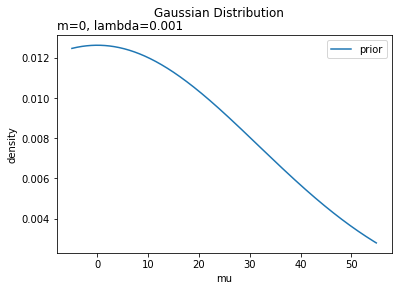

In [26]:
plt.plot(
    mu_line, 
    prior, 
    label='prior', 
) 
plt.xlabel('mu')
plt.ylabel('density')
plt.suptitle('Gaussian Distribution')
plt.title(
    f'm={m}, lambda={lambda_mu}', 
    loc='left',
)
plt.legend()
plt.show()

In [27]:
lambda_mu_hat = N * lmd + lambda_mu
m_hat = (lmd * np.sum(x_n) + lambda_mu * m) / lambda_mu_hat

print(lambda_mu_hat)
print(m_hat)

0.501
23.32354232136523


In [30]:
C_N = 1 / np.sqrt(2 * np.pi / lambda_mu_hat)
posterior = C_N * np.exp(- 0.5 * lambda_mu_hat * (mu_line - m_hat)**2)

prior = stats.norm.pdf(
    x=mu_line, 
    loc=m_hat, scale=np.sqrt(1 / lambda_mu_hat),
)

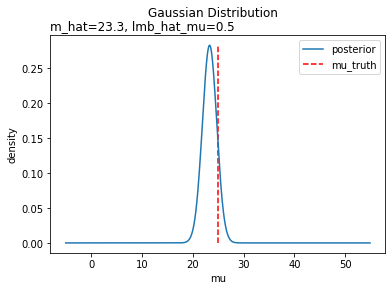

In [33]:
plt.plot(
    mu_line, 
    posterior, 
    label='posterior',
)

plt.vlines(
    x=mu_truth, 
    ymin=0, 
    ymax=max(posterior), 
    label='mu_truth',
    color='red',
    linestyle='--',
)
plt.xlabel('mu')
plt.ylabel('density')
plt.suptitle('Gaussian Distribution')
plt.title(
    f'm_hat={np.round(m_hat, 1)}, lmb_hat_mu={np.round(lambda_mu_hat, 2)}', 
    loc='left',
)
plt.legend()
plt.show()

In [34]:
lambda_star_hat = lmd * lambda_mu_hat / (lmd + lambda_mu_hat)
mu_star_hat = m_hat

print(lambda_star_hat)
print(mu_star_hat)

0.009804305283757338
23.32354232136523


In [35]:
#C_N = 1 / np.sqrt(2 * np.pi / lambda_star_hat)
#predict = C_N * np.exp(- 0.5 * lambda_star_hat * (x_line - mu_star_hat)**2)

predict = stats.norm.pdf(
    x=x_line, 
    loc=mu_star_hat, 
    scale=np.sqrt(1 / lambda_star_hat),
)

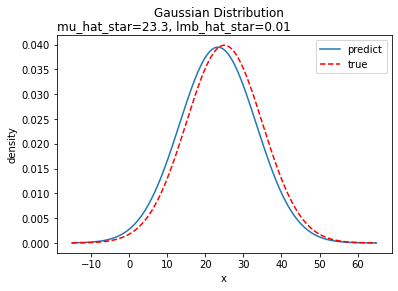

In [38]:
plt.plot(
    x_line, 
    predict, 
    label='predict', 
)

plt.plot(
    x_line, 
    true_model, 
    label='true', 
    color='red', 
    linestyle='--',
)
plt.xlabel('x')
plt.ylabel('density')
plt.suptitle('Gaussian Distribution')
plt.title(f'mu_hat_star={np.round(mu_star_hat, 1)}, lmb_hat_star={np.round(lambda_star_hat, 3)}',
          loc='left',
)
plt.legend()
plt.show()